## **Unsupervised Learning for Customer Segmentation 🫰**


### **Objective:** Analyze the customer dataset using unsupervised learning techniques to identify customer segments and provide recommendations for targeted marketing strategies.

### **Dataset:** The provided dataset can be found on Kaggle - Mall Customer Segmentation Data. It contains information about mall customers, including:  [Link for Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

### **Tasks:**

- Apply an unsupervised learning technique (such as K-means clustering, hierarchical clustering, or DBSCAN) to identify customer segments.

**Based on your analysis, answer the following questions:**
- a. How do the identified customer segments differ from each other in terms of demographics and spending behavior?
- b. Are there any noticeable trends in the spending behavior of customers within each segment?
- c. How does gender influence the customer segments and their spending behavior?

### **Recommendations 🙂**

- Based on your findings, provide recommendations for targeted marketing strategies for each customer segment. Consider aspects such as product offerings,  promotions, and pricing.




In [233]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [234]:
# Loading Data Set
df = pd.read_csv('Data\Raw\Mall_Customers.csv')

In [235]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [236]:
#Checking the Shape of our dataset with
df.shape

(200, 5)

**We have a total of 200 rows and 5 columns.**

- **CustomerID:** Unique ID assigned to the customer
- **Gender:** Gender of the customer
- **Age:** Age of the customer
- **Annual Income (k$):** Annual Income of the customer
- **Spending Score (1-100):** Score assigned by the mall based on customer behavior and spending nature


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### **Descriptive Statistics**

In [238]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


we can see that the average age of the customers is 38.85 years, the average annual income is $60,560, and the average spending score is 50.2. The customers in this dataset range in age from 18 to 70 years old, have annual incomes ranging from $15,000 to $137,000, and spending scores ranging from 1 to 99.

### **Missing & Duplicate values 👉**

In [239]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We Don't Have any missing values

In [240]:
df.duplicated().sum()

0

Hurray! We don't have any duplicate value in our dataset.

### **Data Cleaning 🧽**

In [241]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [242]:
# Doing Label Encoding for gender
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])

Male --> 1 , Female -->0

In [243]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [244]:
df.to_csv("Data\cleaned\Clean_Data.csv")

### **Exploratory Data Analysis 🧠**

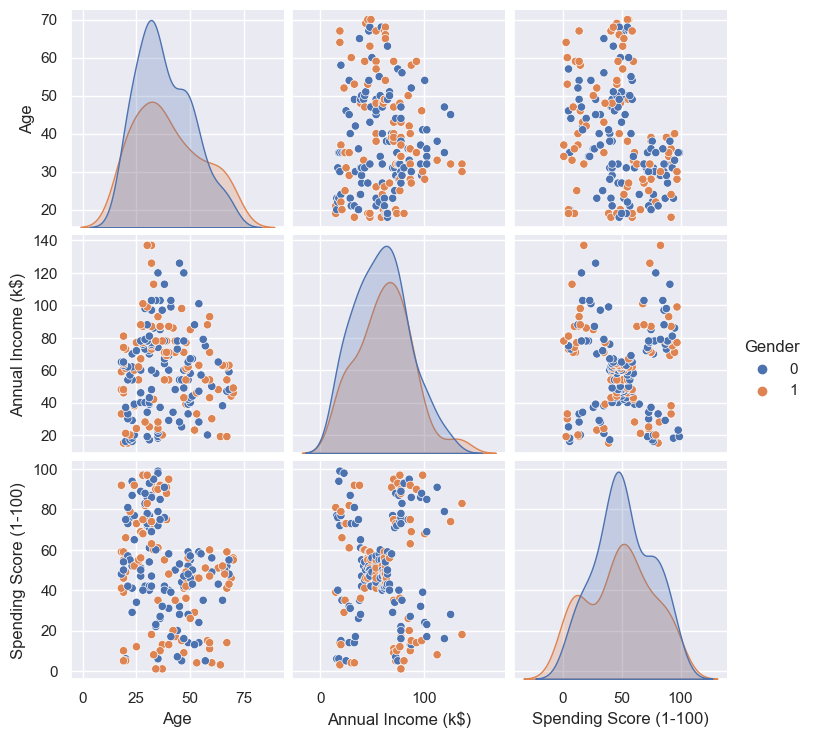

In [245]:
# EDA
sns.pairplot(df.drop(['CustomerID'], axis=1), hue='Gender')
plt.show()

 we can see that there is no clear linear relationship between the variables. 

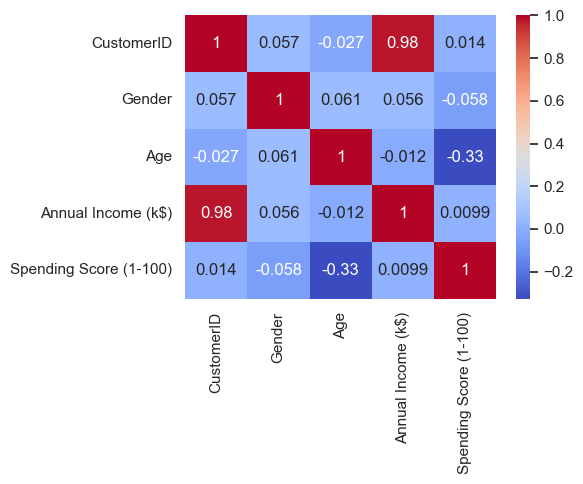

In [246]:
cor = df.corr()
sns.set(font_scale=1.0)
plt.figure(figsize=(6,5))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

It is clear from this correlation table that older customers have less income and therefore spend less money.

C:\Users\Kartik Dhiman\AppData\Local\Temp\ipykernel_11584\461964734.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Kartik Dhiman\AppData\Local\Temp\ipykernel_11584\461964734.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Kartik Dhiman\AppData\Local\Temp\ipykernel_11584\461964734.py:18: UserWa

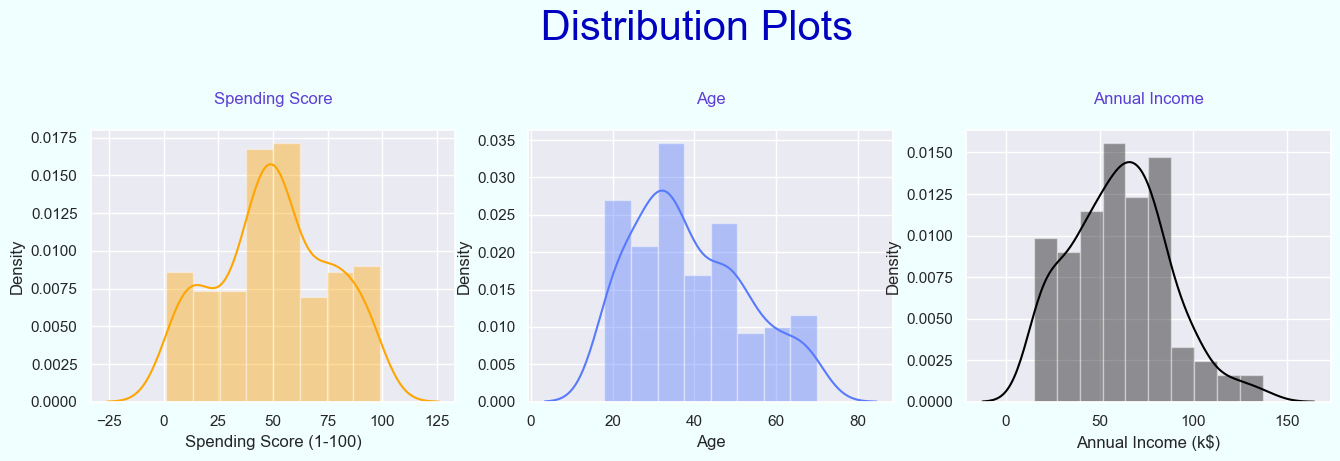

In [247]:
# -Distribution Plots-

plt.figure(figsize=(16,12),facecolor='#F0FFFF')

# Spending Score
plt.subplot(3,3,1)
plt.title('Spending Score\n', color='#5D3FD3')
sns.distplot(df['Spending Score (1-100)'], color='orange')

# Age
plt.subplot(3,3,2)
plt.title('Age\n', color='#5D3FD3')
sns.distplot(df['Age'], color='#577AFF')

# Annual Income 
plt.subplot(3,3,3)
plt.title('Annual Income\n', color='#5D3FD3')
sns.distplot(df['Annual Income (k$)'], color='black')

plt.suptitle(' Distribution Plots\n', color='#0000C1', size = 30)
plt.show()

The distributions are generally similar to the normal distribution, with only a few standard deviations. The 'more normal' distribution among the distributions is the 'Spending Score'. That's good because it's our target column.

In [248]:
# Let's calculate how much to shop for which gender

spending_score_male = 0
spending_score_female = 0

for i in range(len(df)):
    if df['Gender'][i] == 1:
        spending_score_male = spending_score_male + df['Spending Score (1-100)'][i]
    if df['Gender'][i] == 0:
        spending_score_female = spending_score_female + df['Spending Score (1-100)'][i]


print('\033[1m' + '\033[93m' + f'Males Spending Score  : {spending_score_male}')
print('\033[1m' + '\033[93m' + f'Females Spending Score: {spending_score_female}')

Males Spending Score  : 4269
Females Spending Score: 5771


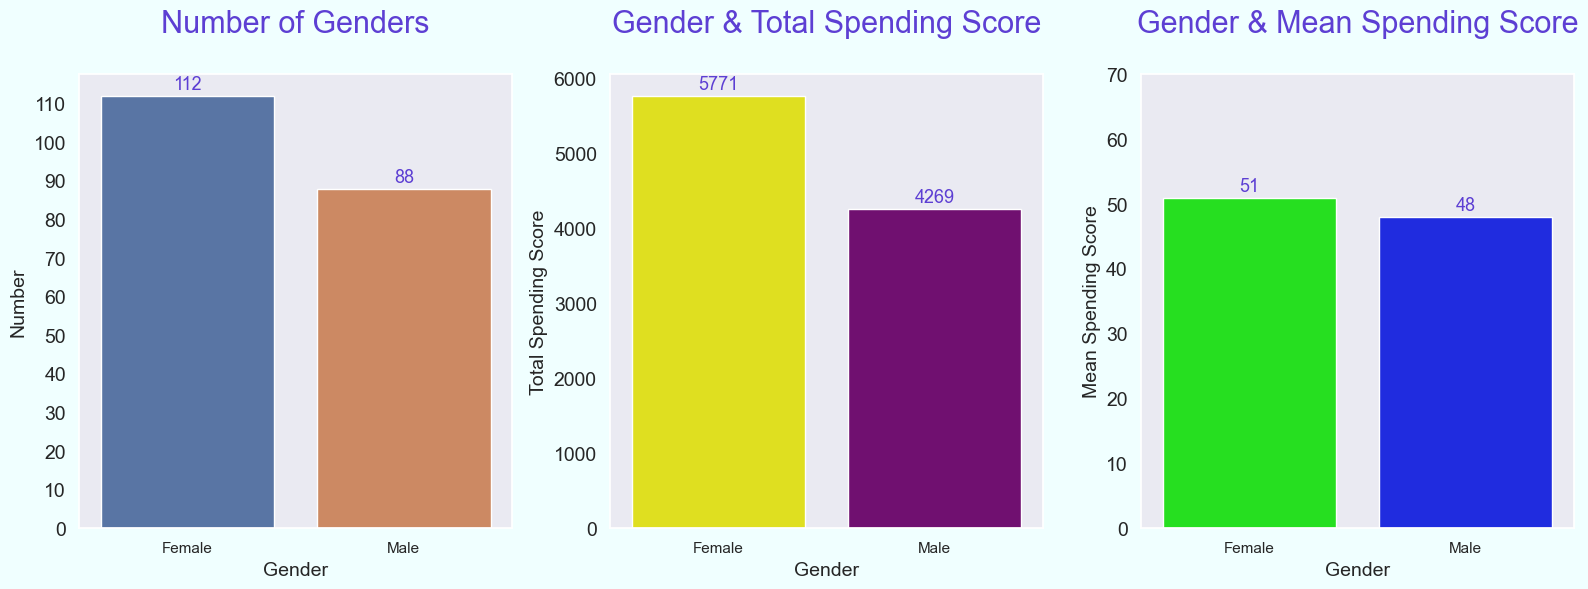

In [249]:
# Let's try to understand the relationship between gender and spending score.
 
# Number of genders
    
plt.figure(figsize=(16,16),facecolor='#F0FFFF')
plt.subplot(3,3,1)
plots = sns.barplot(x=['Female','Male'], y=df['Gender'].value_counts(), data=df)  

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='#5D3FD3')
    
plt.xlabel("Gender", size=14)
plt.ylabel("Number", size=14)
plt.yticks(np.arange(0,116,10),size='14')
plt.grid(False)
plt.title("Number of Genders\n", color="#5D3FD3", size='22')



# Gender & Total Spending Score

list_genders_spending_score = [int(spending_score_female),int(spending_score_male)]
series_genders_spending_score = pd.Series(data = list_genders_spending_score)


plt.subplot(3,3,2)
plots = sns.barplot(x=['Female','Male'], y=series_genders_spending_score, palette=['yellow','purple'])  

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='#5D3FD3')
    
plt.xlabel("Gender", size=14)
plt.ylabel("Total Spending Score", size=14)
plt.yticks(np.arange(0,6001,1000),size='14')
plt.grid(False)
plt.title("Gender & Total Spending Score\n", color="#5D3FD3", size='22')



# Gender & Mean Spending Score 

list_genders_spending_score_mean = [int(spending_score_female/df['Gender'].value_counts()[0]),int(spending_score_male/df['Gender'].value_counts()[1])]
series_genders_spending_score_mean = pd.Series(data = list_genders_spending_score_mean)

plt.subplot(3,3,3)
plots = sns.barplot(x=['Female','Male'], y=series_genders_spending_score_mean, palette='hsv')  

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='#5D3FD3')
    
plt.xlabel("Gender", size=14)
plt.ylabel("Mean Spending Score", size=14)
plt.yticks(np.arange(0,71,10),size='14')
plt.grid(False)
plt.title("Gender & Mean Spending Score\n", color="#5D3FD3", size='22')
plt.tight_layout()
plt.show()

There is no significant difference in the mean spending scores of males and females. Since the mean spending scores are very close to each other, the difference between the total spending scores is the difference between the number of male and female customers, but this difference is not serious. Considering all this, it would be meaningless to choose a gender-based target audience.

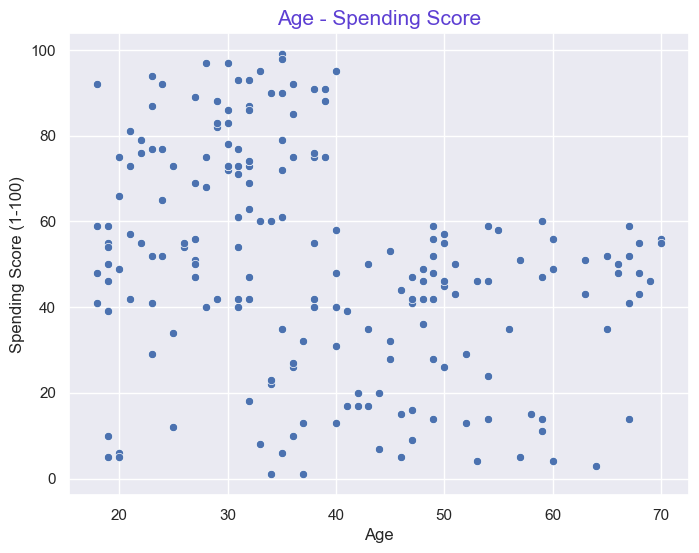

In [250]:
# Let's look at the relationship between Age and Spending score

plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Age'], y = df['Spending Score (1-100)'])
plt.title('Age - Spending Score', size = 15, color='#5D3FD3')
plt.show()

People between the ages of 20-40 have made more purchases, considering the inference we just made about women, we can make our target audience more specific.

C:\Users\Kartik Dhiman\AppData\Local\Temp\ipykernel_11584\3131657674.py:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



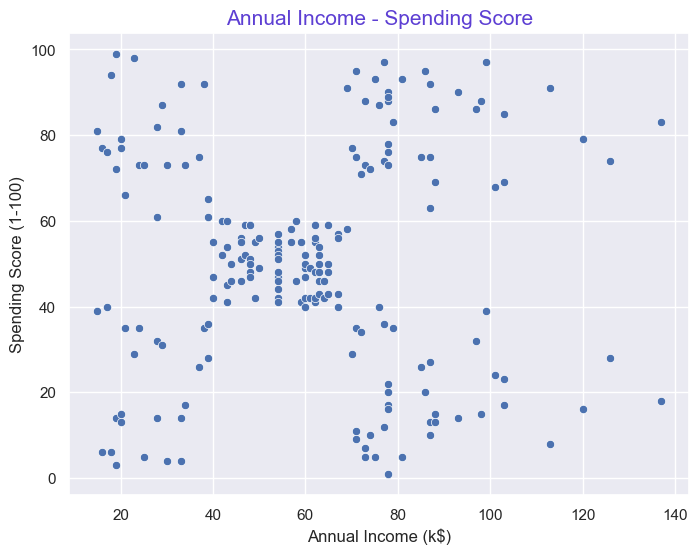

In [251]:
# Let's look at the relationship between Annual Income and Spending Score

plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], palette = "red")
plt.title('Annual Income - Spending Score', size = 15, color='#5D3FD3')
plt.show()

One of the two regions shown can be selected as the target audience. Even though the number of people whose annual income is between (40-60)k$ is higher (we understand this from the number of data points), the number of that audience is higher but the spending score is low, so if we make shopping attractive for them by choosing the target audience from the two regions above, we will see more profit can be made.

### **PCA**

In [252]:
# x assignment
x = df.iloc[:,0:].values 
print("\033[1;31m"  + f'X data before PCA:\n {x[0:5]}')


# standardization before PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)


# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_2D = pca.fit_transform(X)
print("\033[0;32m" + f'\nX data after PCA:\n {X_2D[0:5,:]}')

X data before PCA:
 [[ 1  1 19 15 39]
 [ 2  1 21 15 81]
 [ 3  0 20 16  6]
 [ 4  0 23 16 77]
 [ 5  0 31 17 40]]

X data after PCA:
 [[-2.3169646  -0.45419025]
 [-2.27239142 -1.47410364]
 [-2.45422326 -0.00692224]
 [-2.38646142 -1.74993499]
 [-2.39737671 -0.36934116]]


As you can see, X data, which we defined as 4 dimensional (red part), has now been reduced to 2 dimensions (green part) 

### **Clustering 🧪**

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

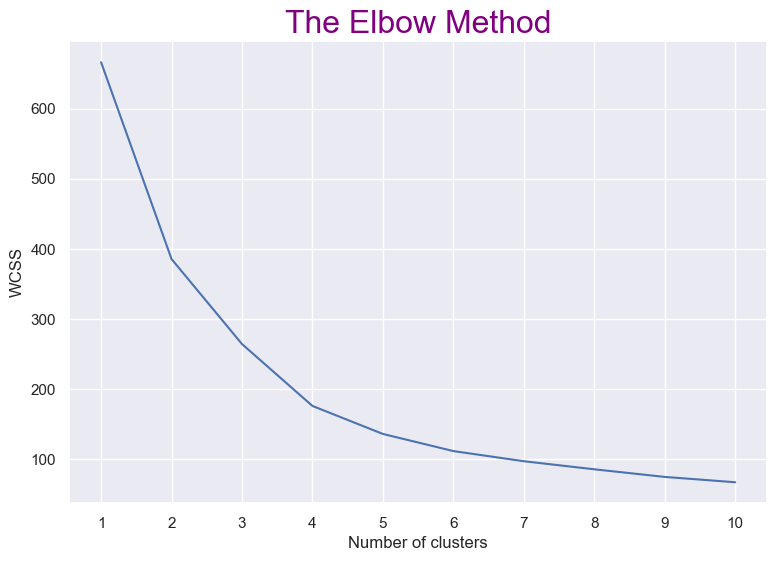

In [253]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(X_2D)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='purple',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

'4' is optimum number of clusters. Because the most break in the chart is at that point. This is how we will select the next optimal n_clusters.

In [254]:
# KMeans
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(X_2D)

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



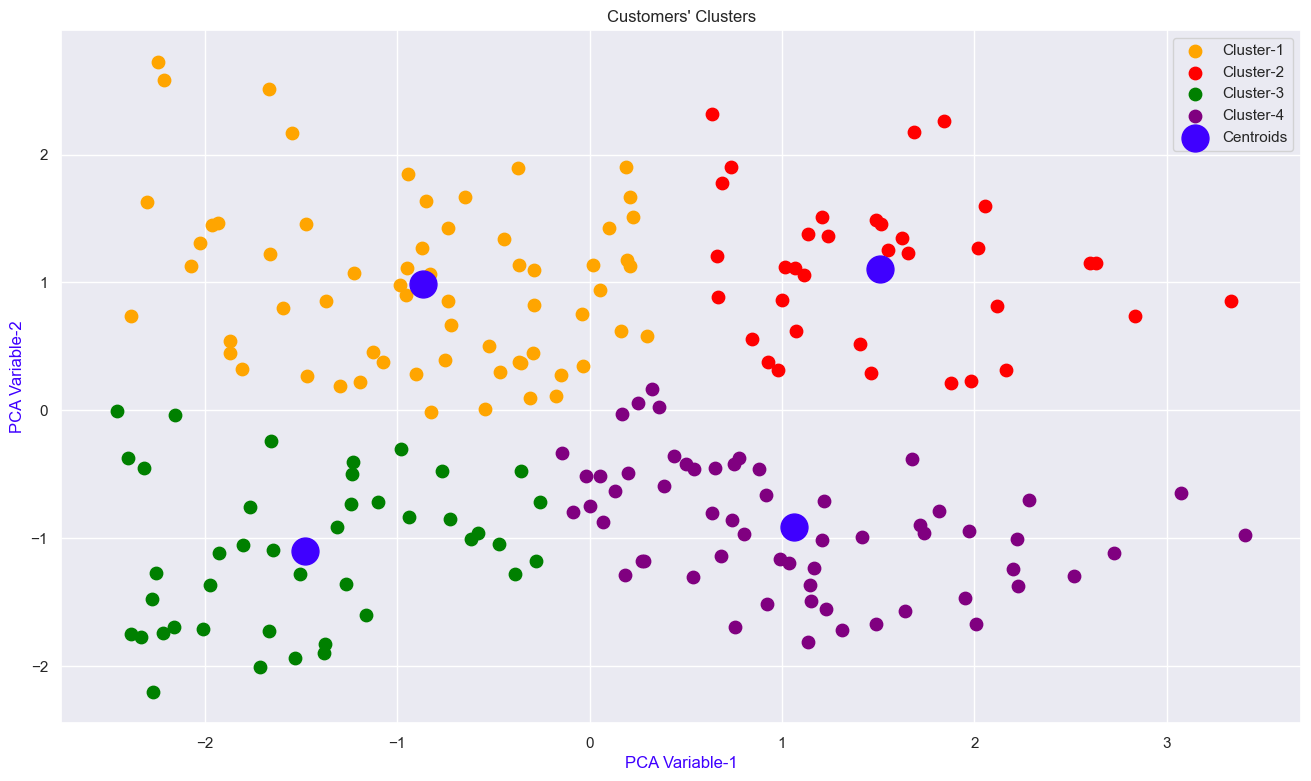

In [255]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(X_2D[y_kmeans == 0, 0], X_2D[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(X_2D[y_kmeans == 1, 0], X_2D[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(X_2D[y_kmeans == 2, 0], X_2D[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster-3')
plt.scatter(X_2D[y_kmeans == 3, 0], X_2D[y_kmeans == 3, 1], s = 80, c = 'purple', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = '#3F00FF', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('PCA Variable-1', color='#3F00FF')
plt.ylabel('PCA Variable-2', color='#3F00FF')
plt.legend()
plt.show()

**Clustering (Age & Annual Income & Spending Score)**

In [256]:
# x assignment
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values
x_df = df[['Age','Annual Income (k$)','Spending Score (1-100)']] # this line for 3d scatter plot

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

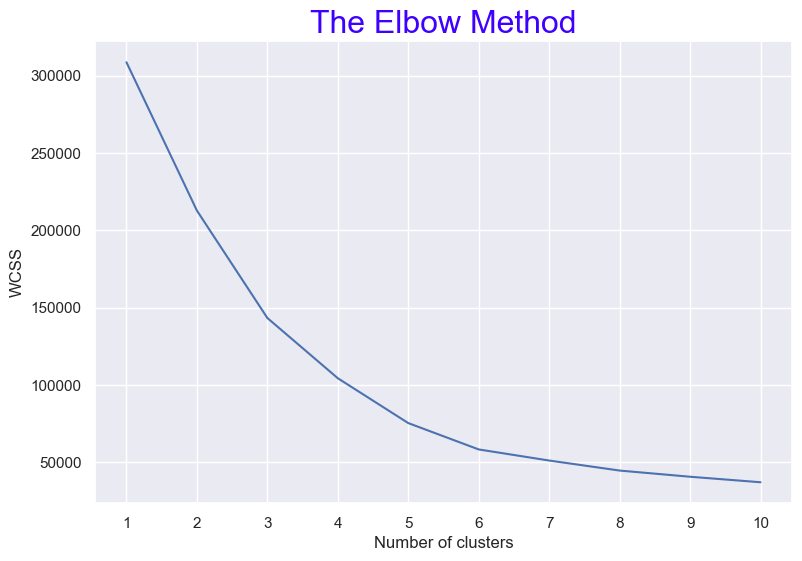

In [257]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='#3F00FF',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

'6' is optimum number of clusters

In [258]:
# KMeans
kmeans = KMeans(n_clusters = 6, init ='k-means++', random_state=88)
clusters = kmeans.fit_predict(x_df)
x_df['label'] = clusters

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Kartik Dhiman\AppData\Local\Temp\ipykernel_11584\4051390023.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [259]:
# clusters visualization
import plotly.express as px
fig = px.scatter_3d(data_frame=x_df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color = 'label', size = 'label')
fig.show()

3D visualization was used as there were 3 variables.

**Clustering (Age & Annual Income)**

In [260]:
# x assignment
x = df[['Age','Annual Income (k$)']].values

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

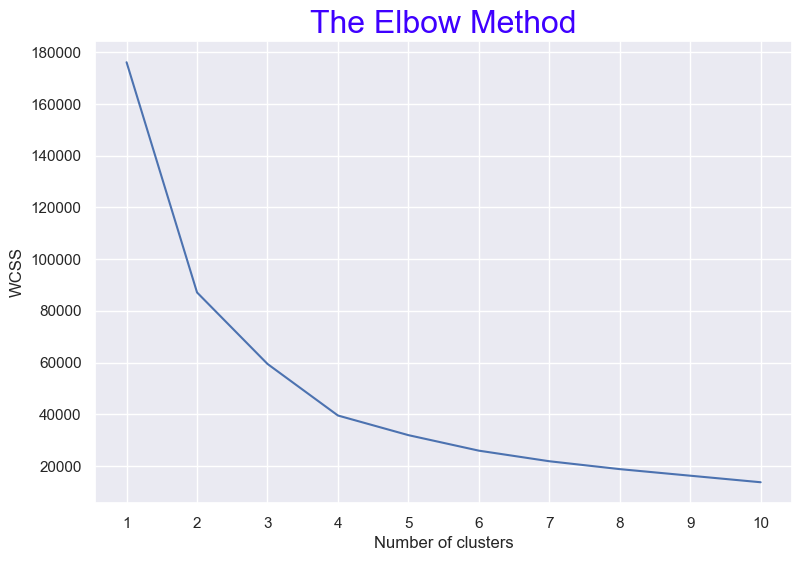

In [261]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='#3F00FF',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

'2' is optimum number of clusters.

In [262]:
# KMeans
kmeans = KMeans(n_clusters = 2, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



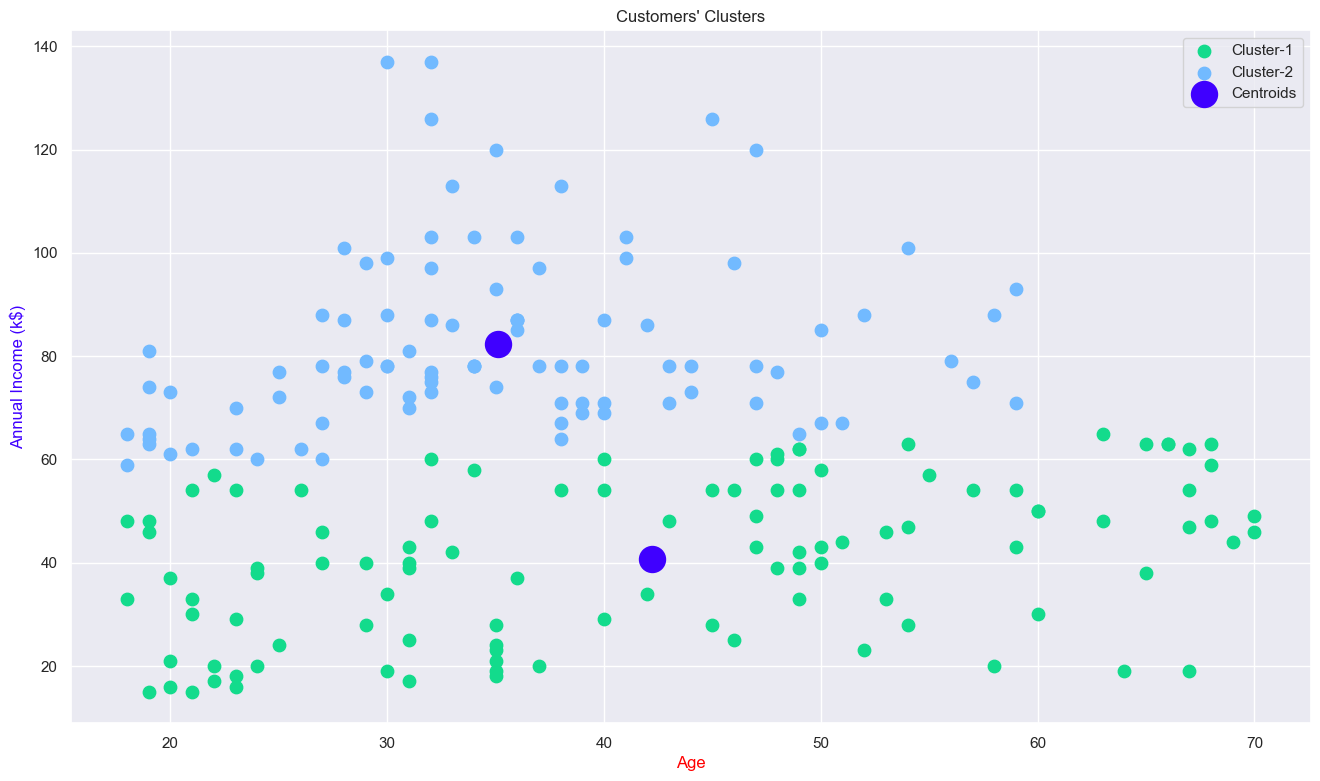

In [263]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = '#13DB8C', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = '#72BAFF', label = 'Cluster-2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 350, c = '#3F00FF', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Age', color='red')
plt.ylabel('Annual Income (k$)', color='#3F00FF')
plt.legend()
plt.show()

**Clustering (Annual Income & Spending Score)**

In [264]:
# x assignment
x = df[['Annual Income (k$)','Spending Score (1-100)']].values

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

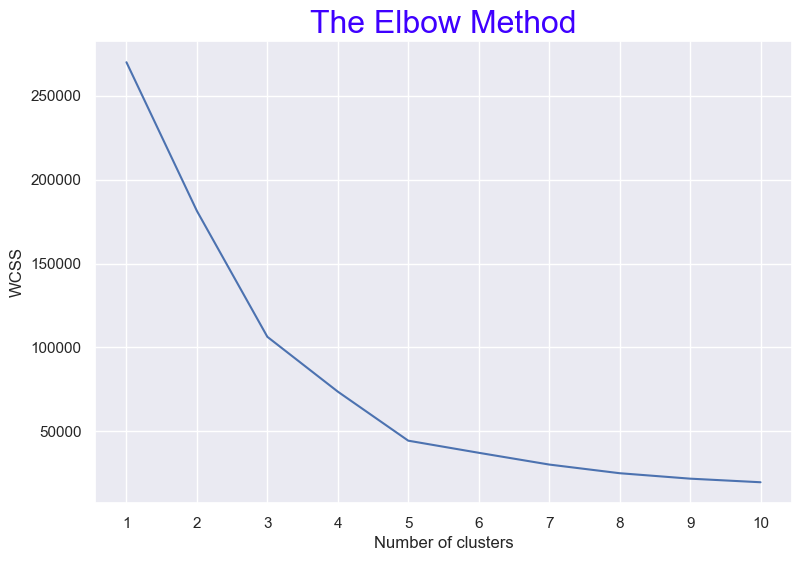

In [265]:
#finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='#3F00FF',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

'5' is optimum number of clusters.

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



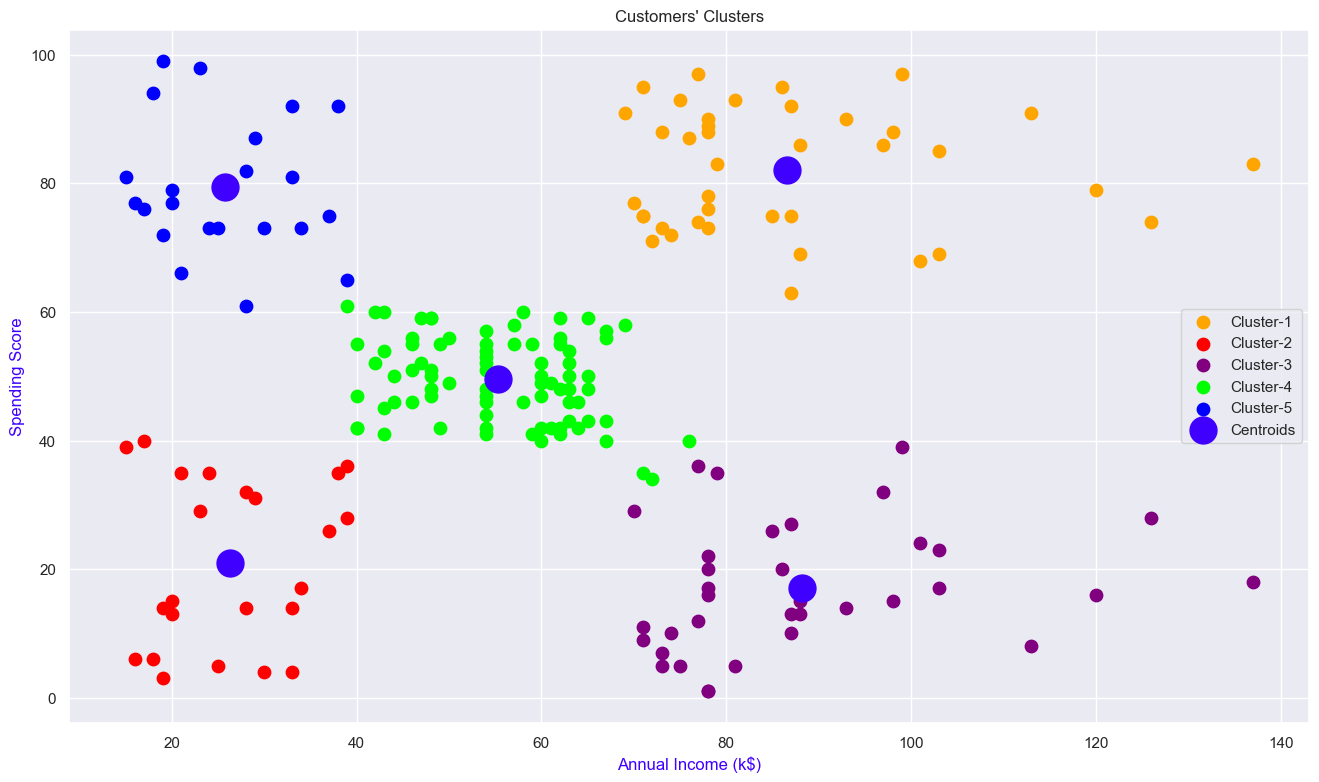

In [266]:
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = 'purple', label = 'Cluster-3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 80, c = 'lime', label = 'Cluster-4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 80, c = 'blue', label = 'Cluster-5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = '#3F00FF', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Annual Income (k$)', color='#3F00FF')
plt.ylabel('Spending Score', color='#3F00FF')
plt.legend()
plt.show()

**Clustering (Age & Spending Score)**

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

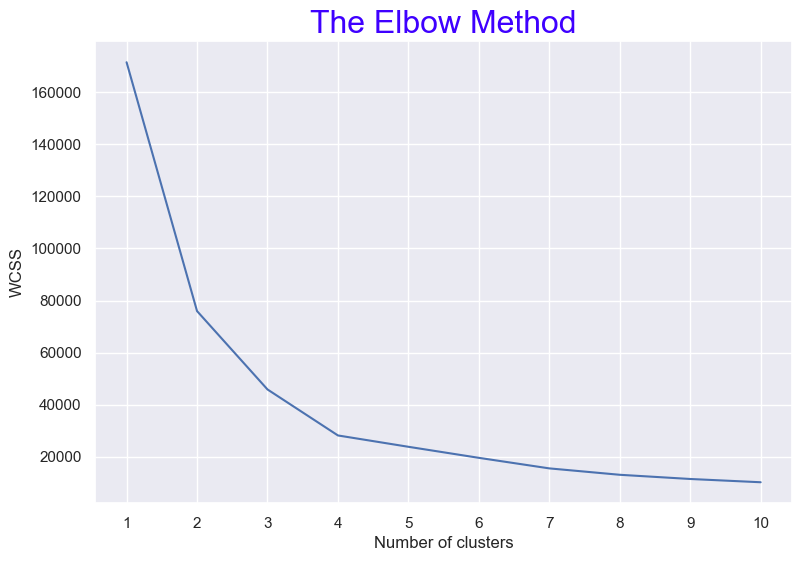

In [267]:
# x assignment
x = df[['Age','Spending Score (1-100)']].values
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='#3F00FF',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

'4' is optimum number of clusters.

c:\Users\Kartik Dhiman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



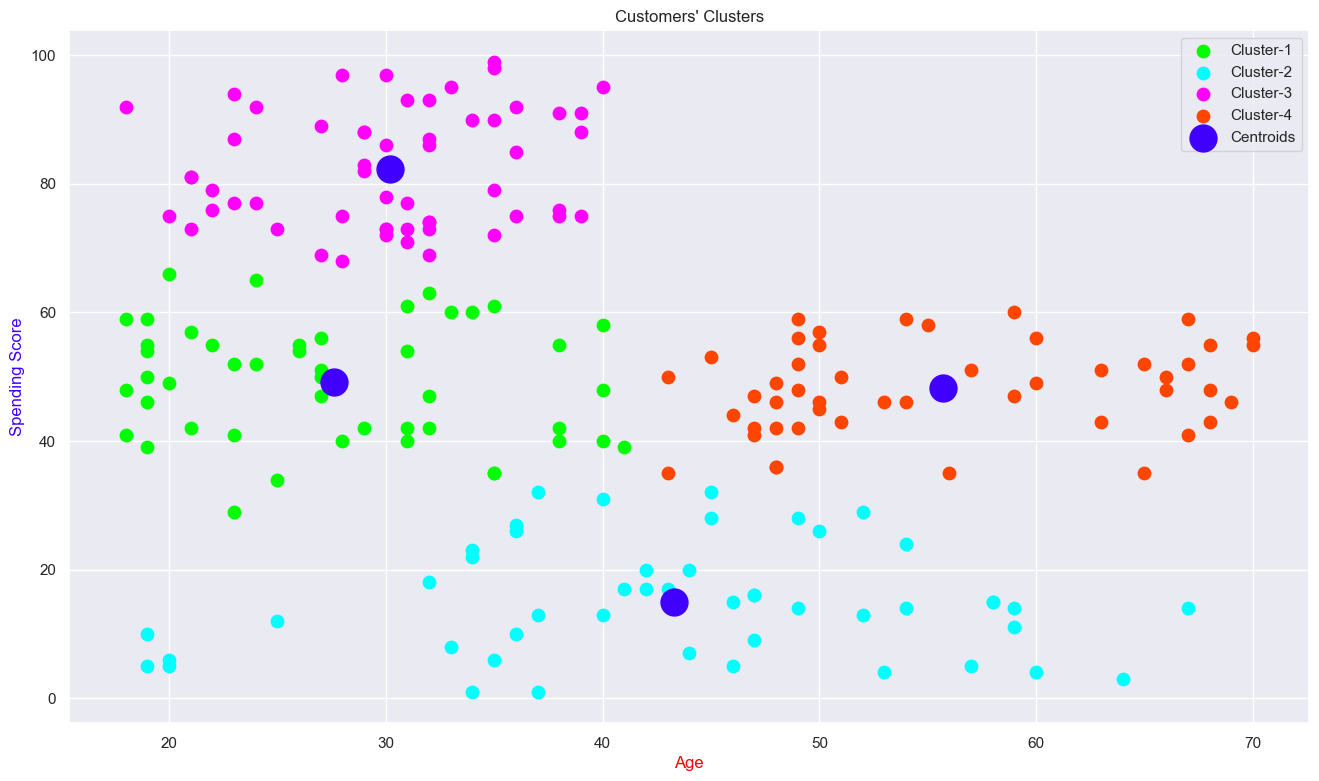

In [268]:
# KMeans
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = '#00FF00', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = '#00FFFF', label = 'Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = '#FF00FF', label = 'Cluster-3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 80, c = '#FF4500', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = '#3F00FF', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Age', color='red')
plt.ylabel('Spending Score', color='#3F00FF')
plt.legend()
plt.show()

- Cluster 1 (Green): This group of customers is relatively young with moderate to high spending scores. Targeted promotions and discounts on products that appeal to this age group, such as technology and fashion, can be effective in driving sales.

- Cluster 2 (Cyan): This cluster represents customers with high age and high spending scores. They may be interested in premium or luxury products and services. Tailored marketing campaigns highlighting exclusivity and high-end features can be effective in targeting this group.

- Cluster 3 (Magenta): This cluster includes customers with low age and low spending scores. They may be price-sensitive and interested in budget-friendly products. Targeted promotions, discounts, and bundle deals can be effective in attracting this group.

- Cluster 4 (Orange): Customers in this cluster are relatively old with moderate to high spending scores. They may be interested in products that improve their quality of life and provide convenience. Marketing campaigns emphasizing the benefits of these products, such as health and wellness benefits, can be effective in targeting this group.

In the first section, I'm finding the optimal number of clusters using the elbow method for a 2D dataset. I plot the within-cluster sum of squares (WCSS) for different values of k and choose the value of k where the plot changes the most, which is 4 in My case. Then, I perform KMeans clustering on the dataset with 4 clusters and plot the clusters along with the centroids.

In the second section, I perform clustering on a 3D dataset and find the optimal number of clusters using the elbow method, which is 6 in My case.then I perform KMeans clustering on the dataset with 6 clusters and add a label column to the original dataframe with the cluster assignments.

In the third section, I perform clustering on a 2D dataset with 2 clusters. I find the optimal number of clusters using the elbow method, which is 2 in My case. then perform KMeans clustering on the dataset with 2 clusters and plot the clusters along with the centroids.

In the fourth section, I perform clustering on a 2D dataset with 5 clusters. I find the optimal number of clusters using the elbow method, which is 5. then perform KMeans clustering on the dataset with 5 clusters and plot the clusters along with the centroids.

In the fifth section, the dataset of customers' age and spending scores is clustered using KMeans clustering algorithm. The elbow method is used to determine the optimal number of clusters, which is found to be 4.


**The segments were named as follows:**

High Income, High Spenders<br>
High Income, Low Spenders<br>
Mid Income, Mid Spenders<br>
Low Income, High Spenders<br>
Low Income, Low Spenders

### **Recommendations for targeted marketing strategies for each customer segment:**

- High Income, High Spenders: Offer high-end products and luxury experiences, and create exclusive membership programs and events to attract and retain customers.

- High Income, Low Spenders: Offer promotions and discounts to encourage spending and target products that appeal to their interests.

- Mid Income, Mid Spenders: Offer a range of affordable products and focus on building strong customer relationships through personalized experiences.

- Low Income, High Spenders: Offer affordable products and create loyalty programs to retain customers.

- Low Income, Low Spenders: Offer value-for-money products and focus on convenience and accessibility to attract customers.

**Insight:**

Gender did not have a significant influence on customer segments and their spending behavior. The male-to-female ratio was almost equal across all segments, and there was no significant difference in spending behavior between male and female customers within each segment.